# Навчання без учителя 
Робота із нерозміченими даними (без колонки target): фото, класифікація, кластеризація.
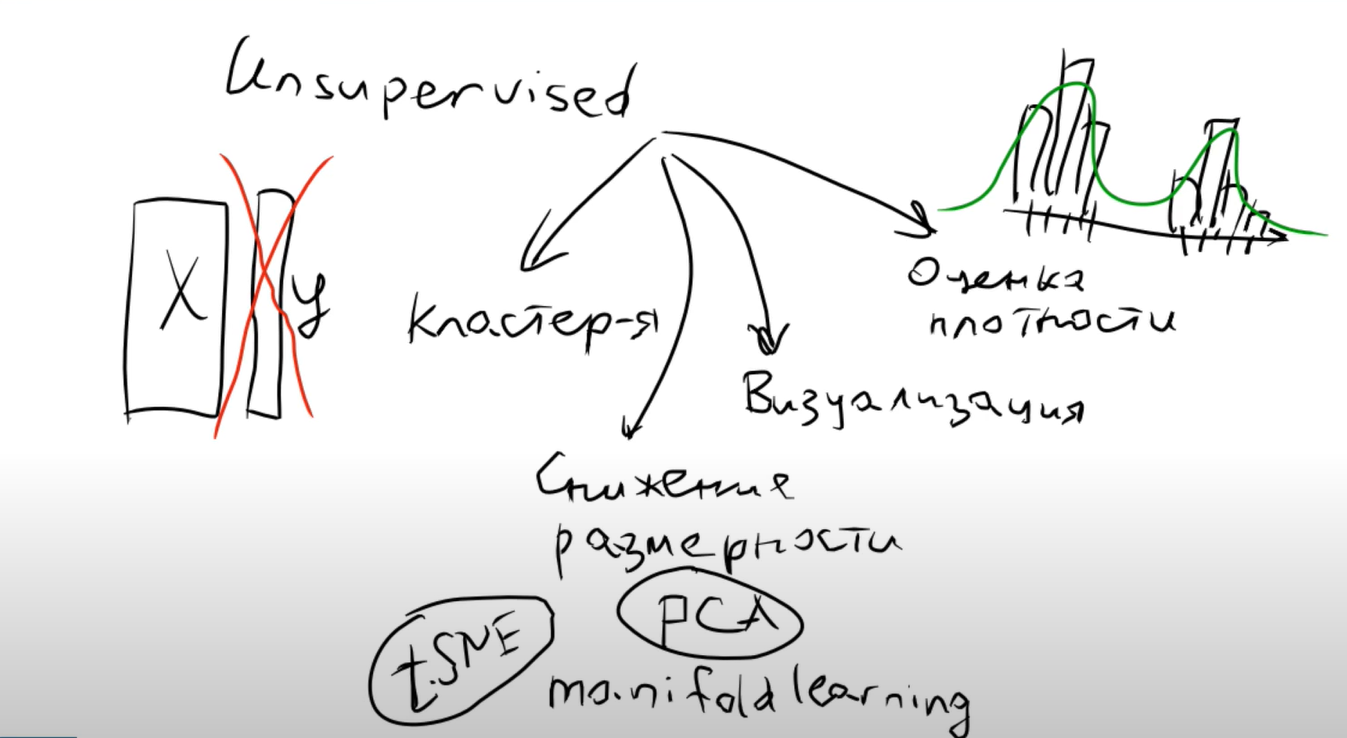

## Алгоритм PCA (метод головних компонент)

Другая формулировка PCA – для данной многомерной случайной величины построить такое ортогональное преобразование координат, что в результате корреляции между отдельными координатами обратятся в ноль. Таким образом, задача сводится к диагонализации матрицы ковариаций, что эквивалентно нахождению сингулярного разложения матрицы исходных данных. Хотя формально задачи сингулярного разложения матрицы данных и спектрального разложения ковариационной матрицы совпадают, алгоритмы вычисления сингулярного разложения напрямую, без вычисления ковариационной матрицы и её спектра, более эффективны и устойчивы.

Ещё одной из формулировок задачи PCA является нахождение такой $d$-мерной плоскости в признаковом пространстве, что ошибка проецирования обучающих объектов на нее будет минимальной. Направляющие векторы этой плоскости и будут первыми $d$ главными компонентами.
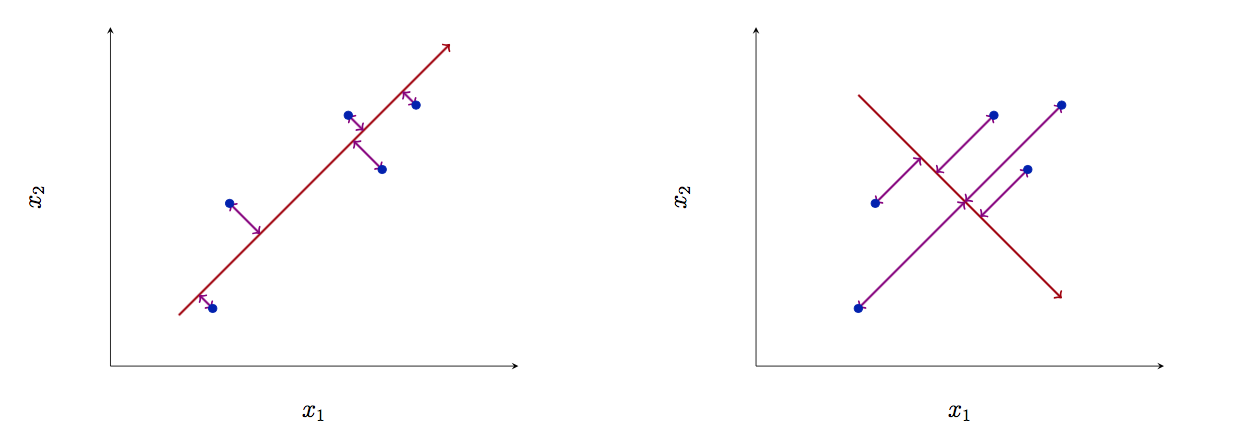
Для "хорошего"направления сумма расстояний до выбранной прямой (гиперплоскости) минимальна. Слева показано "хорошее" направление, справа – "плохое".

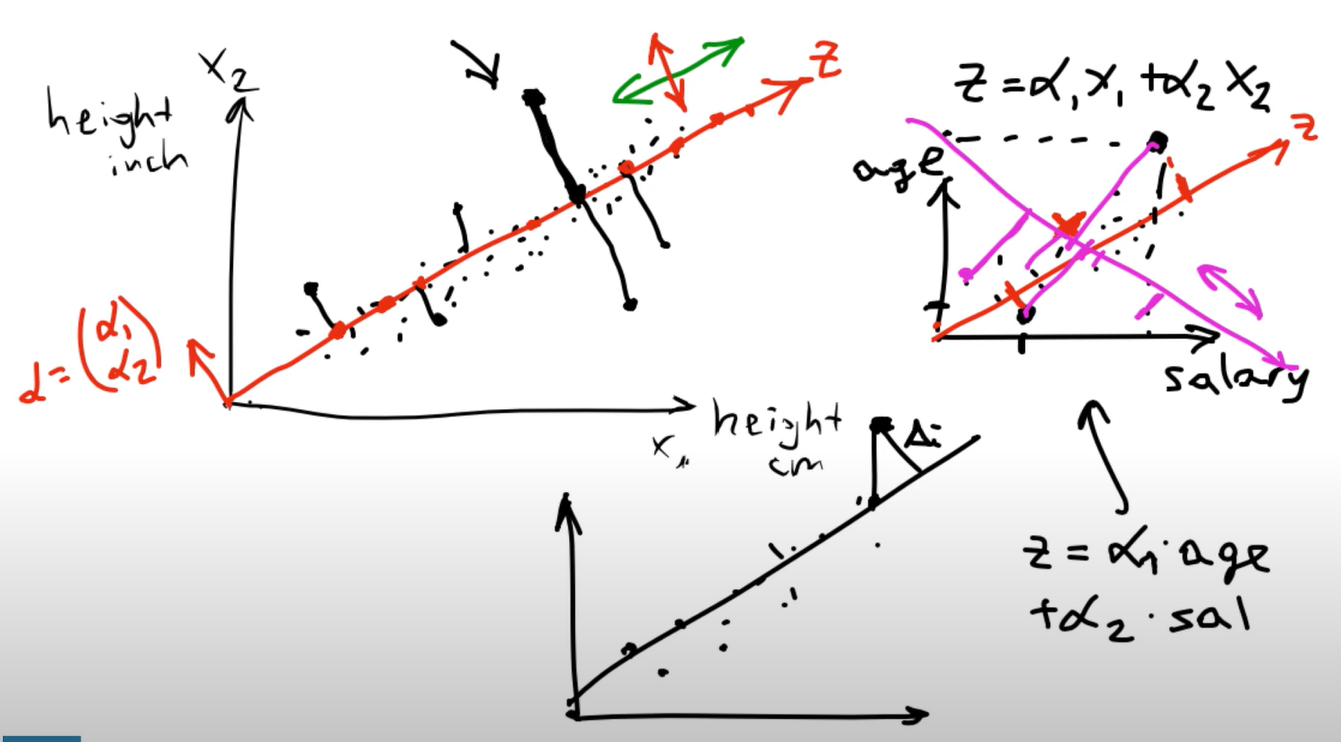
* (α1, α2) - вектор ознак
* Вибирається напрям для прямої, при якому зберігається дисперсія (біля 90% від загальної інформації).
* На відміну від медоду KNN, відстань від точки до прямої образовується через перпендикуляр до неї.


Перехід від координат (x1, x2, x3) до (u, v, w) через поворот:
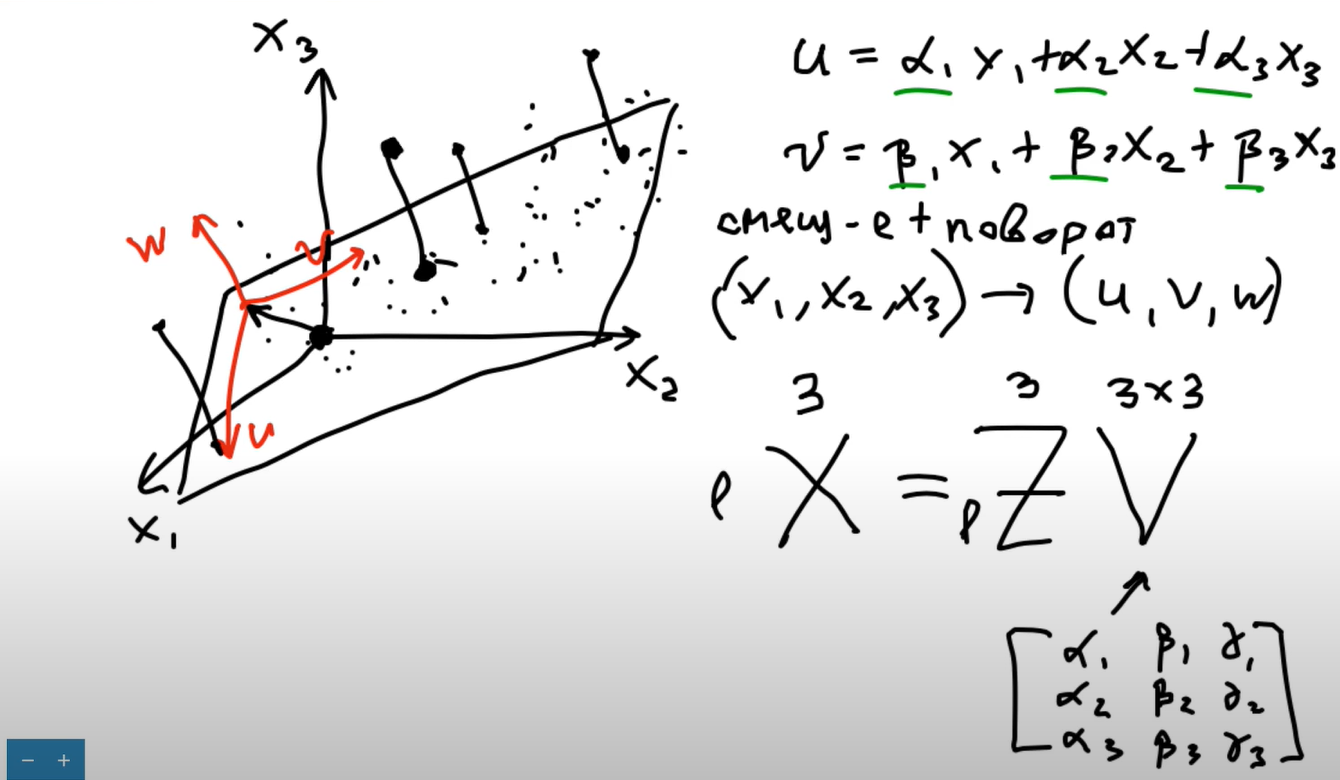
Один из наиболее эффективных способов нахождения собственных векторов матрицы $\Sigma$ - использование сингулярного разложения исходной матрицы $X$:

$$\Large X = UDV^T,$$
где $U \in R^{m \times m}$, $V \in R^{n \times n}$, а $D \in R^{m \times n}$ - диагональная матрица вида

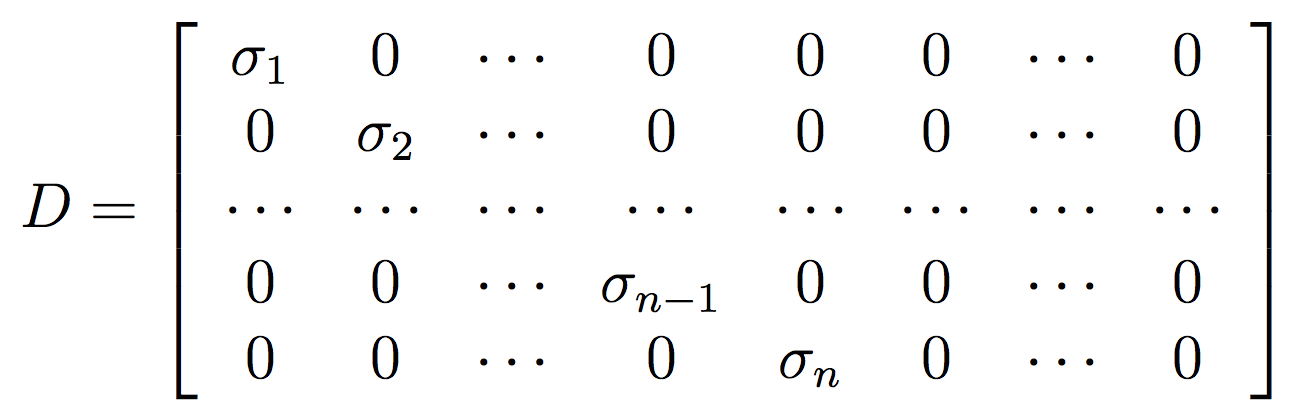

### Сингулярний розклад
Рассмотрим более подробно задачу о сингулярном разложении матрицы $X \in \mathbb{R}^{m \times n}$. Сингулярным разложением матрицы $X$ называется представление её в виде $X = UD V^T$, где:
* $D$ есть $m\times n$ матрица у которой элементы, лежащие на главной диагонали, неотрицательны, а все остальные элементы равны нулю.
* $U$ и $V$ – ортогональные матрицы порядка $m$ и $n$ соответственно.

Элементы главной диагонали матрицы $D$ называются сингулярными числами матрицы $X$, а столбцы $U$ и $V$ левыми и правыми сингулярными векторами матрицы $X$.

Заметим, что матрицы $XX^T$ и $X^TX$ являются симметрическими неотрицательно определенными матрицами, и поэтому ортогональным преобразованием могут быть приведены к диагональному виду, причем на диагонали будут стоять неотрицательные собственные значения этих матриц.

В силу указанных выше свойств матриц $X^TX$ и $XX^T$ сингулярное разложение матрицы $X$ тесно связано с задачей о спектральном разложении этих матриц. Более точно:

* Левые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $XX^T$.
* Правые сингулярные векторы матрицы $X$ – это собственные векторы матрицы $X^TX$.
* Сингулярные числа матрицы $X$ - это корни из собственных значений матрицы $X^TX$ (или $XX^T$).

Таким образом, для нахождения сингулярного разложения матрицы $X$ необходимо, найти собственные векторы и значения матриц $X^TX$ и $XX^T$ и составить из них матрицы $U, V, D$.

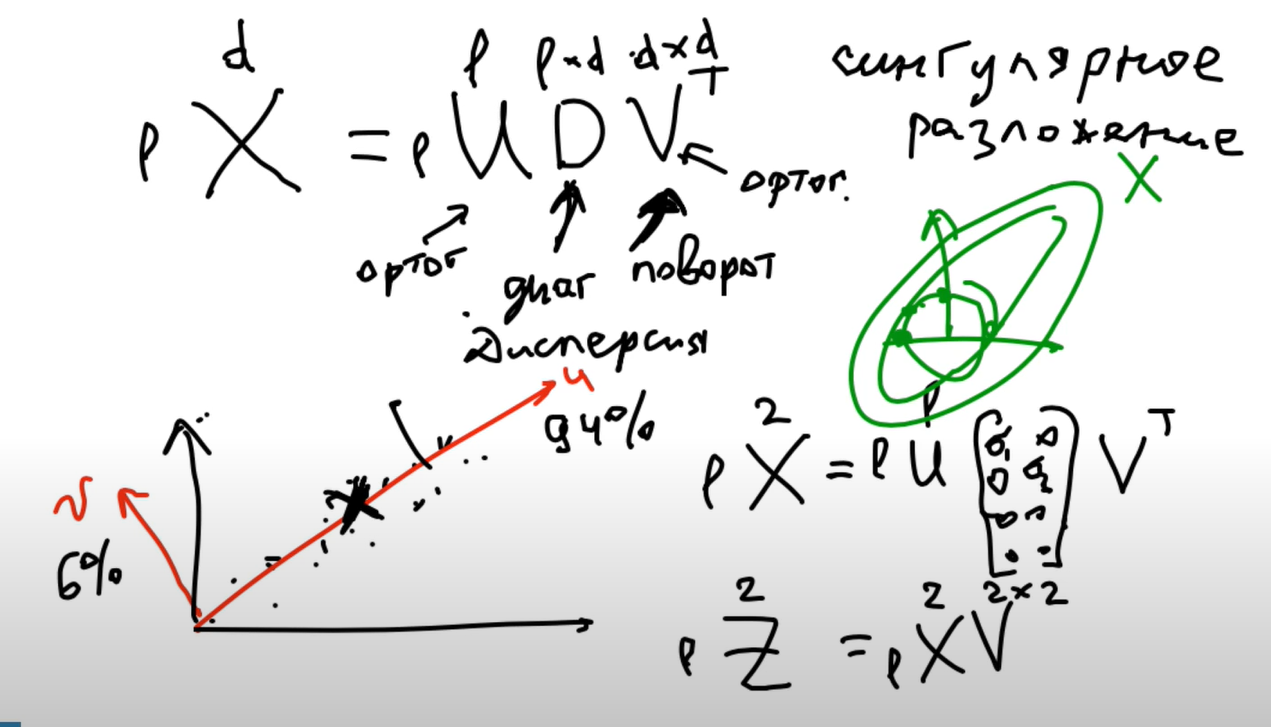



### Алгоритм PCA
1. Определить $k<n$ – новую размерность
2. Вычесть из $X$ среднее, то есть заменить все $\Large x^{(i)}$ на$$\Large  x^{(i)} - \frac{1}{m} \sum_{i=1}^{m}{x^{(i)}}$$
3. Привести данные к единичной дисперсии: посчитать$$\Large  \sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}{(x^{(i)})^2}$$и заменить $\Large x_j^{(i)}$ на $\Large \frac{x_j^{(i)}}{\sigma_j}$
4. Найти сингулярное разложение матрицы $X$:$$\Large X = UDV^T$$
5. Положить $V =$ [$k$ левых столбцов матрицы $V$]
6. Вернуть новую матрицу

## Застосування методу PCA

### 2D - випадок

In [1]:
import numpy as np

%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
def forest_acc(X, y):
    """Ф-ція, яка виводить точність 'лісової' класифікації"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)
    clf = DecisionTreeClassifier(max_depth=2, random_state=42)
    clf.fit(X_train, y_train)
    preds = clf.predict_proba(X_test)
    return(f"Точність: {round(accuracy_score(y_test, preds.argmax(axis=1))*100, 2)}%")


Пропорція дисперсій дня 2-х компонент: [0.93751739 0.06248261]

Напрямки головних компонент: [[-0.57678634  0.81689505]
 [ 0.81689505  0.57678634]] 



C:\Users\miker\AppData\Local\Temp/ipykernel_20860/3160454155.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 1797)


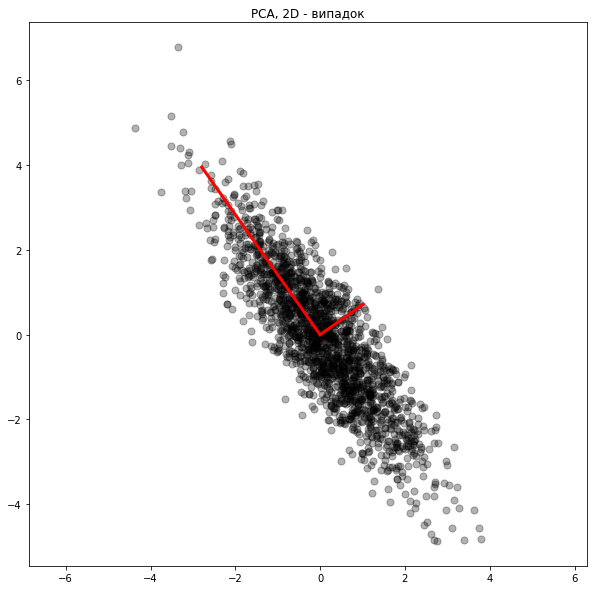

In [3]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0 , -1.0],
                [-2.0, 3.0]])

X = np.random.multivariate_normal(mean, cov, 1797)

pca = PCA()
pca.fit(X)
X_reduced = pca.fit_transform(X)

print(f'\nПропорція дисперсій дня {len(pca.components_)}-х компонент: {pca.explained_variance_ratio_}')
print(f'\nНапрямки головних компонент:', pca.components_[:],'\n')

plt.figure(figsize=(10,10));
plt.scatter(X[:, 0], X[:, 1], s=50, c='k', alpha=0.3);

for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5*np.sqrt(l)*v
    plt.plot([0, d[0]], [0, d[1]], 'r', lw=3)

plt.title(f'PCA, 2D - випадок')
plt.axis('equal')
plt.show()


Первая главная компонента (ей соответствует более длинный вектор) объясняет более 90% дисперсии исходных данных. Это говорит о том, что она содержит в себе почти всю информацию о расположении выборки в пространстве, и вторая компонента может быть опущена. Спроецируем данные на первую компоненту.

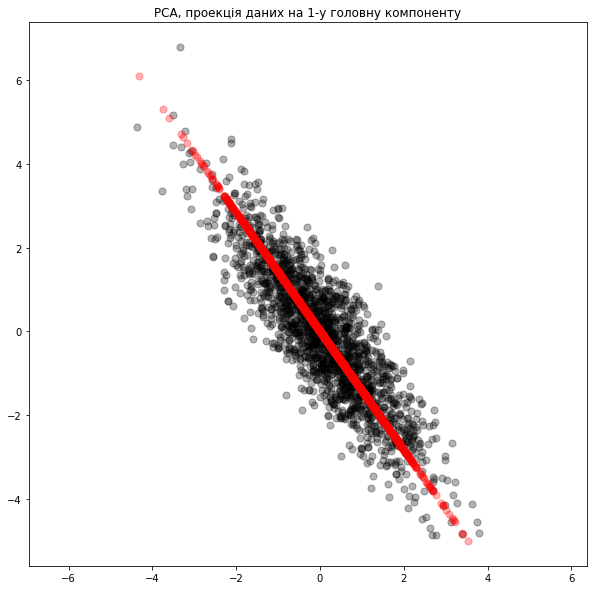

In [4]:
# Забезпечення збереження 90% дисперсії
pca = PCA(.9)
X_reduced = pca.fit_transform(X)

# Підстановака даних у простір ознак
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10));
plt.scatter(X[:, 0], X[:, 1], s=50, c='k', alpha=0.3);
plt.scatter(X_new[:, 0], X_new[:, 1], s=50, c='r', alpha=0.3);
plt.title(f'PCA, проекція даних на 1-у головну компоненту')
plt.axis('equal')
plt.show()

                            
                            

Мы понизили размерность данных вдвое, при этом сохранив наиболее значимые черты. В этом заключается основной принцип понижения размерности – приблизить многомерный набор данных с помощью данных меньшей размерности, сохранив при этом как можно больше информации об исходных данных.

### Багатовимірний випадок

Одним из применений метода главных компонент является визуализации многомерных данных в двухмерном (или трехмерном) пространстве. Для этого необходимо взять первые две главных компоненты и спроецировать данные на них. При этом, если признаки имеют различную природу, их следует отмасштабировать. Основные способы масштабирования:

* На единичную дисперсию по осям (масштабы по осям равны средним квадратичным отклонениям — после этого преобразования ковариационная матрица совпадает с матрицей коэффициентов корреляции).
* На равную точность измерения (масштаб по оси пропорционален точности измерения данной величины).
* На равные требования в задаче (масштаб по оси определяется требуемой точностью прогноза данной величины или допустимым её искажением — уровнем толерантности).

#### Набір даних Iris

Значення 2-х компонент:
0.36 x sepal length (cm) + -0.08 x sepal width (cm) + 0.86 x petal length (cm) + 0.36 x petal width (cm)
0.66 x sepal length (cm) + 0.73 x sepal width (cm) + -0.17 x petal length (cm) + -0.08 x petal width (cm)

Пропорція дисперсій дня 2-х компонент: [0.92461872 0.05306648]
Точність: 88.89% - для багатовимірної вибірки
Точність: 91.11% - результат PCA-алгоритму


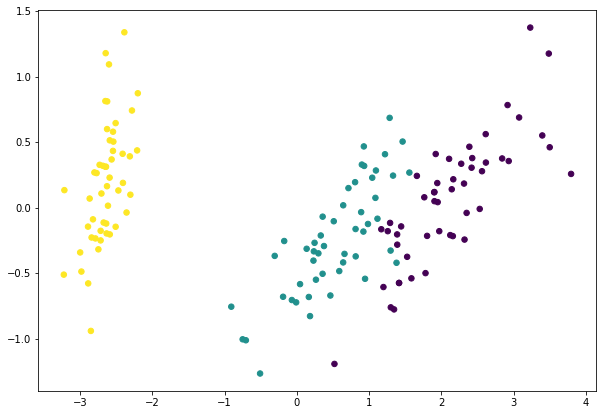

In [5]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X);

print(f"Значення 2-х компонент:")
for component in pca.components_:
    print(' + '.join([f'{round(value,2)} x {name}' for value, name in zip(component, iris.feature_names)]))

print(f'\nПропорція дисперсій дня {len(pca.components_)}-х компонент: {pca.explained_variance_ratio_}')
print(forest_acc(X, y), '- для багатовимірної вибірки')
print(forest_acc(X_reduced, y), '- результат PCA-алгоритму')

plt.figure(figsize=(10,7));
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=30, cmap='viridis_r')
plt.show()

#### Набір даних digits


Пропорція дисперсій дня 2-х компонент: [0.14890594 0.13618771]
Точність: 31.11% - для багатовимірної вибірки
Точність: 34.07% - результат PCA-алгоритму


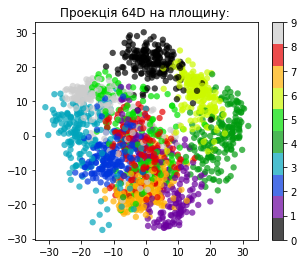

In [6]:
from sklearn.datasets import load_digits

X, y = load_digits().data, load_digits().target

pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)

print(f'\nПропорція дисперсій дня {len(pca.components_)}-х компонент: {pca.explained_variance_ratio_}')
print(forest_acc(X, y), '- для багатовимірної вибірки')
print(forest_acc(X_reduced, y), '- результат PCA-алгоритму')

plt.figure(figsize = (5, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.title(f'Проекція {X.shape[1]}D на площину: ')
plt.colorbar()
plt.show()

Полученная картинка позволяет увидеть зависимости между различными цифрами. Например, цифры 0 и 6 располагаются в соседних кластерах, что говорит об их схожем написании. Наиболее "разбросанный" (по другим кластерам) – это кластер, соответствующий цифре 8, что говорит о том, что она имеет много различных написаний, делающих её схожей со многими другими цифрами.

Посмотрим, как выглядят первые две главные компоненты.

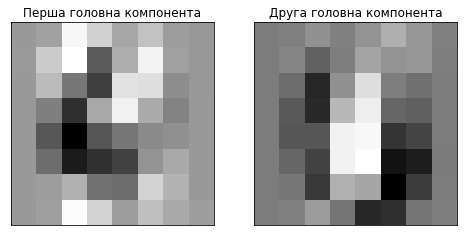

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,8))

im1 = pca.components_[0]
ax1.imshow(im1.reshape(8,8), cmap='binary')
ax1.set_xticks([]), ax1.set_yticks([])
ax1.set_title('Перша головна компонента')

im2 = pca.components_[1]
ax2.imshow(im2.reshape(8,8), cmap='binary')
ax2.set_xticks([]), ax2.set_yticks([])
ax2.set_title('Друга головна компонента')

plt.show()

#### t-SNE - алгоритм
Алгоритм t-SNE складається з двох основних етапів. Спочатку, t-SNE створює розподіл ймовірностей по парам багатовимірних об'єктів таким чином, що подібні об'єкти мають високу ймовірність бути вибраними, в той час як несхожі точки мають надзвичайно малу ймовірність бути вибраними разом. Далі, t-SNE визначає подібний розподіл ймовірностей для точок у карті низьковимірного простору та мінімізує розбіжності за відстанню Кульбака–Лейблера між двома розподілами за місцем розташування точок на карті. Зверніть увагу, що хоч оригінальний алгоритм і використовує евклідову відстань між об'єктами, як основну метрику подібності об'єктів, проте, вона може бути змінена при необхідності.

Точність: 31.11% - для багатовимірної вибірки
Точність: 40.0% - результат t-SNE -алгоритму


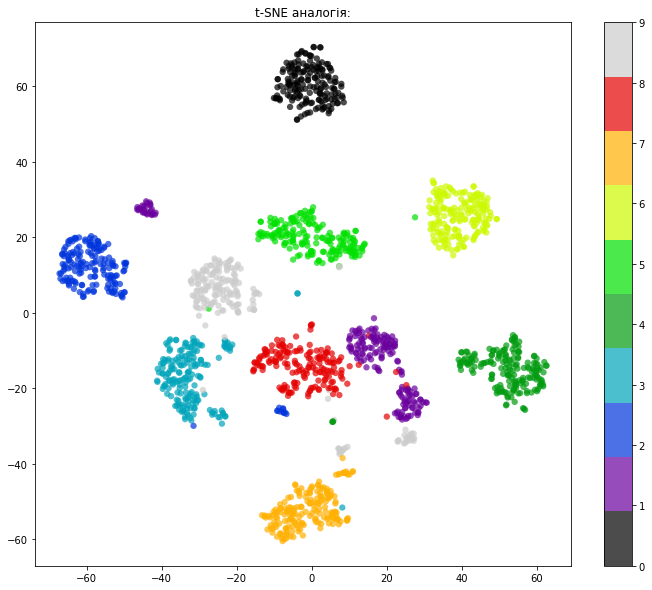

Wall time: 10.9 s


In [8]:
%%time

X, y = load_digits().data, load_digits().target

tsne = TSNE(n_components=2, n_iter=1000, random_state=17)
X_reduced = tsne.fit_transform(X)

print(forest_acc(X, y), '- для багатовимірної вибірки')
print(forest_acc(X_reduced, y), '- результат t-SNE -алгоритму')

plt.figure(figsize = (12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.title(f't-SNE аналогія:')
plt.colorbar()
plt.show()

На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. В данном случае для этого достаточно выделить 21 главную компоненту, то есть снизить размерность с 64 признаков до 21.

### Зжимання даних за розмірностями
Другим применением PCA является снижение размерности данных для их сжатия. Рассмотрим, как влияет число отбираемых главных компонент (на которые осуществляется проекция) на качество восстановления исходного изображения.

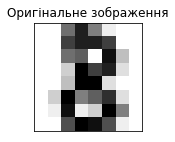

Точності "лісових" класифікаторів для перших 8 ітерацій:
34.63% 34.07% 36.11% 36.11% 36.11% 36.11% 36.11% 36.11% 
Wall time: 2.77 s


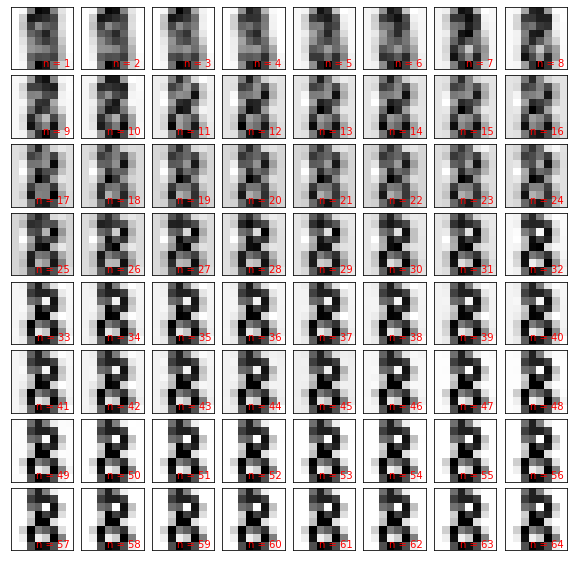

In [9]:
%%time

plt.figure(figsize=(4,2))
plt.imshow(X[8].reshape(8,8), cmap='binary')
plt.xticks([]), plt.yticks([])
plt.title('Оригінальне зображення')
plt.show()

fig, axes = plt.subplots(8, 8, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

print('Точності "лісових" класифікаторів для перших 8 ітерацій:')
for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[8].reshape(1, -1)))
                                                          
    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, f'n = {i+1}', ha='right',
            transform=ax.transAxes, color='red')
    ax.set_xticks([]), ax.set_yticks([])

    if i<8:
        X_reduced = pca.fit_transform(X)
        print(forest_acc(X_reduced, y)[-6:-1], end='% ')
print()

Как понять, какое число главных компонент достаточно оставить? Для этого может оказаться полезным следующий график, выражающий зависимость общей доли объясняемой дисперсии от числа главных компонент.

Для збереження 90% дисперсії достатньо залишити 21 компонент.


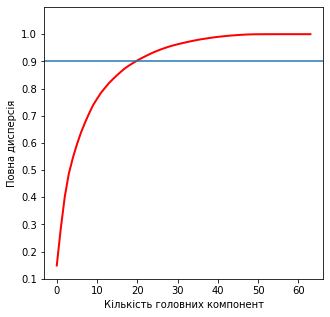

In [10]:
pca = PCA().fit(X)

# top = [(i, j*100) for i,j in enumerate(np.cumsum(pca.explained_variance_ratio_)) if  0.9<=j<=0.91][0]
top = (PCA(.9).fit(X).n_components_, 90)

print(f'Для збереження {round(top[1] ,2)}% дисперсії достатньо залишити {top[0]} компонент.')

plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'r', lw=2)
plt.xlabel('Кількість головних компонент')
plt.ylabel('Повна дисперсія')

plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(0.1, 1.1)
plt.axhline(0.9 )

plt.show()

#### Передопрацювання вибірки для подальшого навчання
Метод главных компонент часто используется для предварительной обработки данных перед обучением классификатора. В качестве примера такого применения рассмотрим задачу о распознавании лиц.



In [11]:
%%time 

lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4, data_home='data/faces')

print(f'Розмірність даних (об\'єкти, ознаки, класи): {*lfw_people.data.shape, len(lfw_people.target_names)}')
print('\nІмена класів:',', '.join(lfw_people.target_names), '\n')

for i, name in enumerate(lfw_people.target_names):
    print(f'{name}: {(lfw_people.target == i).sum()} фото')
    
print()

fig = plt.figure(figsize=(8,6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i+1, xticks=[], yticks=[])
    ax.imshow(lfw_people.images[i], cmap='bone')



EOFError: Compressed file ended before the end-of-stream marker was reached

In [12]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=17)

print(f'Розмірність навчальної та тестової вибірок: {len(X_train), len(X_test)}')

NameError: name 'lfw_people' is not defined

Вместо обычного PCA воспользуемся его приближенной версией (randomized PCA), которая позволяет существенно ускорить работу алгоритма на больших наборах данных. Выделим 100 главных компонент. Как видно, они объясняют более 90% дисперсии исходных данных.

In [ ]:
pca = PCA(n_components=100, svd_solver='randomized').fit(X_train)

plt.figure(figsize=(10,10))

percentile = round(np.cumsum(pca.explained_variance_ratio_)[-1] * 100, 2)
plt.title(f'Вибір 100 головних компонент, що описують {percentile} % дисперсії вибірки')

plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, 'r', lw=2)

plt.xlim([0, 100])

plt.yticks(np.arange(20, 110, 10))
plt.xticks(np.arange(0, 100, 10))

plt.axhline(90, c='k')

plt.xlabel('Кількість компонент')
plt.ylabel('Опис дисперсії, %')

plt.grid(alpha=.5, linestyle='-')

plt.show()

Посмотрим на главные компоненты (или главные "лица"). Видим, что первые главные компоненты несут в себе информацию в основном об освещении на фотографии, в то время как оставшиеся выделяют какие-то отдельные черты человеческого лица - глаза, брови и другие.

In [ ]:
plt.imshow(pca.mean_.reshape((50,37)), cmap='bone')
plt.xticks([]), plt.yticks([])
plt.show()

Перейдем теперь непосредственно к классификации. Мы сократили размерность данных (с 1850 признаков до 100), что позволяет существенно ускорить работу стандартных алгоритмов обучения. Настроим SVM с RBF-ядром и посмотрим на результаты классификации.

In [ ]:
%%time
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = LinearSVC(random_state=17)
clf.fit(X_train_pca, y_train);
y_predicted = clf.predict(X_test_pca)

In [ ]:
print(f'Точність: {round(accuracy_score(y_test, y_predicted)*100, 2)}%')
print(classification_report(y_test, y_predicted, target_names=lfw_people.target_names))

# матриця невідповдностей
M = confusion_matrix(y_test, y_predicted)
M_normalizesd = M.astype(float)/ M.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,10))
im = plt.imshow(M_normalizesd, interpolation='nearest', cmap='Reds')
plt.colorbar(im, shrink=0.71)

tick_marks = np.arange(len(lfw_people.target_names))
plt.xticks(tick_marks - 0.5, lfw_people.target_names, rotation=45)
plt.yticks(tick_marks, lfw_people.target_names)
plt.tight_layout()
plt.ylabel('Спражній клас')
plt.xlabel('Результат прогнозу')
plt.title('Нормалізована матриця невідповдностей')

plt.show()